In [8]:
%autoreload
import numpy as np
import matplotlib.pyplot as plt
from IttiKoch import IttiKoch,get_gaussian
import sys
sys.path.append('/gpfs01/bethge/home/oeberle/Scripts/deepgaze/SaliencyModels/')
import scipy.misc
face = scipy.misc.face()
import tensorflow as tf
from MLCFeatures1D  import MLC_tf
from model import collect_features_mlc, flat2gen

ERROR:root:Line magic function `%autoreload` not found.


In [ ]:
major_stddev = 2.
elongation = 2.
filterperiod = np.pi
filtersize = -1
angle = 135. # Controls orientation
phase = 45.

minor_stddev = major_stddev * elongation
max_stddev = np.max([major_stddev,minor_stddev])

sz = filtersize
if (sz == -1):
    sz = np.ceil(max_stddev*np.sqrt(10))
else:
    sz = np.floor(sz/2)


psi = np.pi / 180. * phase
rtDeg = np.pi / 180. * angle

omega = 2 * np.pi / filterperiod
co = np.cos(rtDeg)
si = -np.sin(rtDeg)
major_sigq = 2 * major_stddev**2
minor_sigq = 2 * minor_stddev**2

vec = np.arange(-sz,sz+1)
vlen = len(vec)
vco = vec*co
vsi = vec*si

            
major = np.repeat(vco[np.newaxis,:].T, vlen, 1) + np.repeat(vsi[np.newaxis,:], vlen, 0)
major2 = major**2

minor = np.repeat(vsi[np.newaxis,:].T, vlen, 1) - np.repeat(vco[np.newaxis,:], vlen, 0)
minor2 = minor**2

result = np.cos(omega*major + psi)*np.exp(-major2/major_sigq - minor2/minor_sigq)

filter = result - np.mean(result)
filter = filter / np.sqrt(np.sum(filter**2))

In [ ]:
major_stddev = gaborParams.stddev;
minor_stddev = major_stddev * gaborParams.elongation;
max_stddev = max(major_stddev,minor_stddev);

sz = gaborParams.filterSize;
if (sz == -1)
  sz = ceil(max_stddev*sqrt(10));
else
  sz = floor(sz/2); 
end

psi = pi / 180 * phase;
rtDeg = pi / 180 * angle;

omega = 2 * pi / gaborParams.filterPeriod;
co = cos(rtDeg);
si = -sin(rtDeg);
major_sigq = 2 * major_stddev^2;
minor_sigq = 2 * minor_stddev^2;

% prepare grids for major and minor components
vec = [-sz:sz];
vlen = length(vec);
vco = vec*co;
vsi = vec*si;

major = repmat(vco',1,vlen) + repmat(vsi,vlen,1);
major2 = major.^2;
minor = repmat(vsi',1,vlen) - repmat(vco,vlen,1);
minor2 = minor.^2;

% create the actual filter
result = cos(omega * major + psi) .* ...
exp(-major2 / major_sigq ...
    -minor2 / minor_sigq);

% enforce disc shape?
if (makeDisc)
  result((major2+minor2) > (gaborParams.filterSize/2)^2) = 0;
end

% normalization
filter = result - mean(result(:));
filter = filter / sqrt(sum(filter(:).^2));

In [ ]:
ans =

 Columns 1 through 7:

    0.00000   -0.70711   -1.41421   -2.12132   -2.82843   -3.53553   -4.24264

 Columns 8 through 14:

   -4.94975   -5.65685   -6.36396   -7.07107   -7.77817   -8.48528   -9.19239

 Columns 15 through 21:

   -9.89949  -10.60660  -11.31371  -12.02082  -12.72792  -13.43503  -14.14214

 Columns 22 through 27:

  -14.84924  -15.55635  -16.26346  -16.97056  -17.67767  -18.38478


   18.38478   17.67767   16.97056   16.26346   15.55635   14.84924   14.14214

 Columns 8 through 14:

   13.43503   12.72792   12.02082   11.31371   10.60660    9.89949    9.19239

 Columns 15 through 21:

    8.48528    7.77817    7.07107    6.36396    5.65685    4.94975    4.24264

 Columns 22 through 27:

    3.53553    2.82843    2.12132    1.41421    0.70711    0.00000

In [2]:
import scipy.misc
face = scipy.misc.face()

image = scipy.misc.imread('/gpfs01/bethge/home/oeberle/Images_local/pop_out.jpg')


In [3]:
input_tensor = tf.placeholder('float', shape=(None,  None, None, 3))
A = IttiKoch(gabor_size = 16,feature_type = 'conspicuity', ref_scale = 1) #s_min_max= [1,4], deltas= [2,3]
net = A.build(input_tensor)

2 5 [3, 4]
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
17 17
BEFORE Tensor("truediv:0", shape=(?, ?, ?, 1), dtype=float32)
AFTER Tensor("Conv2D:0", shape=(?, ?, ?, 1), dtype=float32)
17 17
BEFORE Tensor("truediv:0", shape=(?, ?, ?, 1), dtype=float32)
AFTER Tensor("Conv2D_1:0", shape=(?, ?, ?, 1), dtype=float32)
17 17
BEFORE Tensor("truediv:0", shape=(?, ?, ?, 1), dtype=float32)
AFTER Tensor("Conv2D_2:0", shape=(?, ?, ?, 1), dtype=float32)
17 17
BEFORE Tensor("truediv:0", shape=(?, ?, ?, 1), dtype=float32)
AFTER Tensor("Conv2D_3:0", shape=(?, ?, ?, 1), dtype=float32)
17 17
BEFORE Tensor("gauss_blur_40/gauss_1d_1/gaussian_convolution:0", shape=(?, ?, ?, 1), dtype=float32)
AFTER Tensor("Conv2D_4:0", shape=(?, ?, ?, 1), dtype=float32)
17 17
BEFORE Tensor("gauss_blur_40/gauss_1d_1/gaussian_convolution:0", shape=(?, ?, ?, 1), dtype=float32)
AFTER

In [4]:
image = scipy.misc.imresize(image, (480,640,3))
with tf.Session() as sess:
    feed_dict = {A._input:image[np.newaxis,:,:,:]}
    #result = sess.run({k:v for k,v in net.items() if type(k)==int},feed_dict)
    conspicuity = sess.run(net['conspicuity'],feed_dict)

    readout_features = sess.run(net['readout_features'],feed_dict)
    features = sess.run(net['raw_readout_features'],feed_dict)
    #filters = ses's.run(net['filters'])
    pre_features = sess.run(net['pre_features'],feed_dict)
    #features_#norm = sess.run( net['features_normalized'],feed_dict)
    #orients = sess.run(net[1]['orientation'],feed_dict)

In [ ]:
net['features']['orientation']

In [9]:
tmp = net['conspicuity']
up_scaled_inputs = [tf.concat(3,list(tmp['intensity'].values())),
                         tf.concat(3,list(flat2gen(list(tmp['color'].values())))),
                         tf.concat(3,list(flat2gen(list(tmp['orientation'].values()))))
                        ]

In [10]:
up_scaled_inputs

[<tf.Tensor 'concat_1:0' shape=(?, ?, ?, 6) dtype=float32>,
 <tf.Tensor 'concat_2:0' shape=(?, ?, ?, 6) dtype=float32>,
 <tf.Tensor 'concat_3:0' shape=(?, ?, ?, 4) dtype=float32>]

intensity _c_3_s_7
(1, 240, 320, 1)


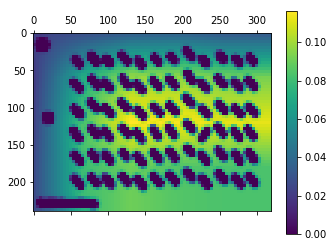

intensity _c_4_s_8
(1, 240, 320, 1)


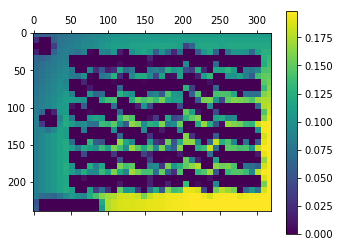

intensity _c_2_s_5
(1, 240, 320, 1)


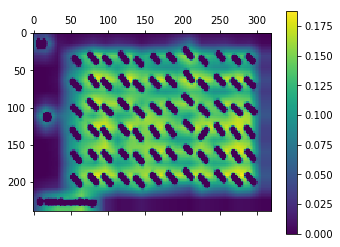

intensity _c_3_s_6
(1, 240, 320, 1)


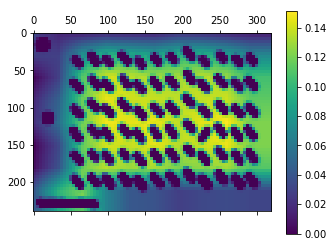

intensity _c_2_s_6
(1, 240, 320, 1)


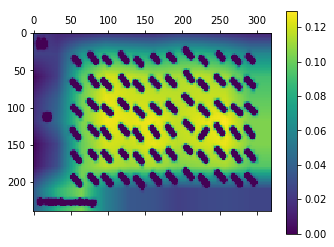

intensity _c_4_s_7
(1, 240, 320, 1)


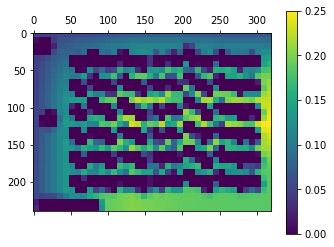

color RG_c_2_s_6_+_BY_c_2_s_5
(1, 240, 320, 1)


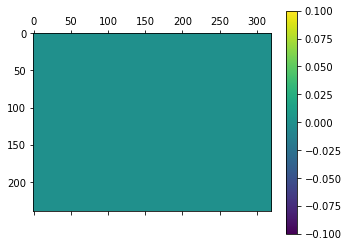

color RG_c_3_s_7_+_BY_c_2_s_6
(1, 240, 320, 1)


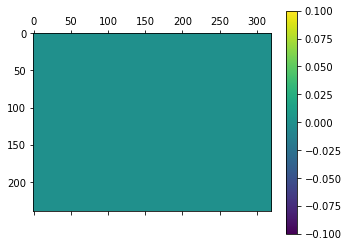

color RG_c_2_s_5_+_BY_c_4_s_7
(1, 240, 320, 1)


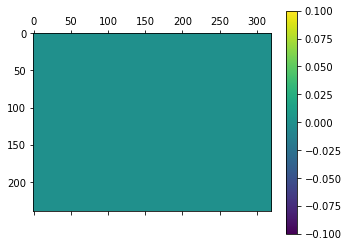

color RG_c_4_s_7_+_BY_c_3_s_6
(1, 240, 320, 1)


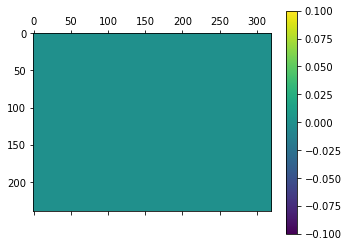

color RG_c_3_s_6_+_BY_c_4_s_8
(1, 240, 320, 1)


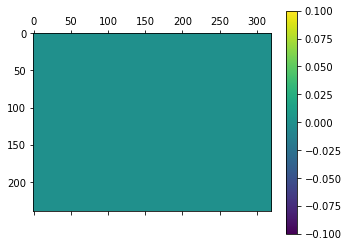

color RG_c_4_s_8_+_BY_c_3_s_7
(1, 240, 320, 1)


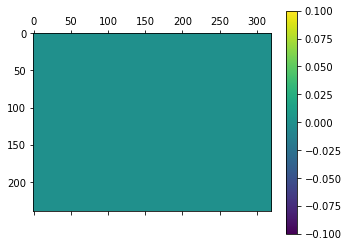

orientation 0.0
(1, 240, 320, 1)


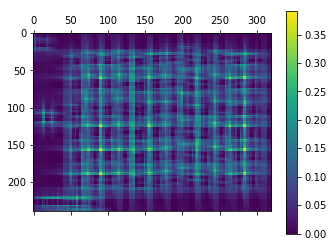

orientation 90.0
(1, 240, 320, 1)


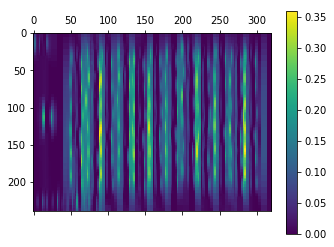

orientation 45.0
(1, 240, 320, 1)


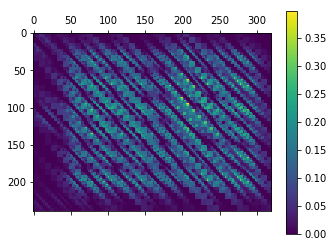

orientation 135.0
(1, 240, 320, 1)


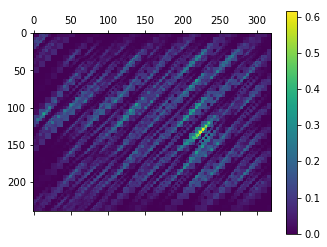

In [6]:
for a,b in conspicuity.items():
    for c,d in b.items():
        print(a,c)
        print(d.shape)
        plt.matshow(d.squeeze())
        plt.colorbar()
        plt.show()

        

In [ ]:
count = 0
for k,v in features.items():
    for l in range(len(v)):
        for m in range(len(v[l])):
            plt.matshow(v[l][0].squeeze())
            print(np.shape(v[l][m]))

            plt.title(str(l)+ k)
            plt.colorbar()
            plt.show()
            count = count + 1
            
print(count)


In [ ]:
tmp = net['raw_readout_features']

up_scaled_features = tmp['intensity'] + list(flat2gen(net['raw_readout_features']['color'])) + list(flat2gen(net['raw_readout_features']['orientation']))



In [ ]:
def flat2gen(alist):
    for item in alist:
        if isinstance(item, list):
            for subitem in item: yield subitem
        else:
            yield item
net['raw_readout_features']['orientation']

In [ ]:
for k,v, in pre_features['R_pyr'].items():
    plt.matshow(v.squeeze())
    plt.title(k)
    plt.colorbar()
    plt.show()


In [ ]:
for k,v, in pre_features['intensity_pyr'].items():
    plt.matshow(v.squeeze())
    plt.title(k)
    plt.colorbar()
    plt.show()


In [ ]:
for k,v in pre_features['orientation_pyr'].items():
    fig, axs = plt.subplots(1,4, figsize = (20,10))
    
    for hilf,ax in zip(v.items(), axs.flatten()):
        kk = hilf[0]
        vv = hilf[1]
        f = ax.matshow(vv.squeeze())
        ax.set_title(str(k) + '_' + kk)
    fig.colorbar(f, fraction = 0.03)
    plt.show()

In [ ]:
plt.imshow(image)
plt.axis('off')
plt.show()
for k,v in pre_features.items():
    for kk,vv in v.items():
        try:
            if kk == 'input':
                a = vv.squeeze()[:,:,0]
                b = vv.squeeze()[:,:,1]
                c = vv.squeeze()[:,:,2]

                plt.imshow(vv.squeeze()/np.max(vv.squeeze()))
                plt.colorbar()
                plt.title(k+kk)
                plt.show()
            else:
                plt.imshow(vv.squeeze())
                plt.colorbar()
                plt.title(kk)
                plt.show()
        except AttributeError: 
            for kkk,vvv in vv.items():

                try:
                    plt.imshow(vvv.squeeze())
                    plt.colorbar()
                    plt.title(kkk)
                    plt.show()

                except AttributeError: 
                    for kkkk,vvvv in vvv.items():             
                        plt.imshow(vvvv.squeeze())
                        
                        plt.title(kkkk)
                        plt.show()
 
                          
                                                
                                            


In [ ]:
plt.imshow(image)
plt.show()
for a,b, in conspicuity.items():
    for k,v in b.items():
        print(k)
        if type(k) == str:
            try:
                plt.matshow(v.squeeze())
                print(v.squeeze().shape)
                plt.title(k)
                plt.colorbar()
                plt.axis('off')
                plt.show()
            except AttributeError:
                for kk,vv in v.items():
                    plt.matshow(vv.squeeze())
                    print(v.squeeze().shape)
                    plt.title(kk)
                    plt.colorbar()
                    plt.axis('off')
                    plt.show()
        else:
            plt.matshow(v.squeeze())
            print(v.squeeze().shape)
            plt.title(k)
            plt.colorbar()
            plt.axis('off')
            plt.show()

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
def map_normalization(src):
        # Global maximum
        
        M = tf.reduce_max(src)
       
        # Normalize to [0,1] range
        Min = tf.reduce_min(src)
        #src = (src-Min)/(M-Min)
        
        #(x, mean, variance, offset, scale, variance_epsilon, name=None)
        variance = (M-Min)**2
        src = tf.nn.batch_normalization(src, Min, variance, offset = None, scale= None ,variance_epsilon=tf.constant(1e-4,tf.float32))

        # Now gloab maximus should be 1
        
        # Resize (maybe somewhere else? )
        src= tf.image.resize_images(src, [30,40])
        # Finding other local maxima
        
        stepsize = 5
        shape = src.get_shape().as_list()
        print('SHAPE', shape)
        width = shape[2]
        height = shape[1]
        # find local maxima
        numlocal = tf.cast(0.,tf.float32)
        lmaxmean = tf.cast(0.,tf.float32)
        
        for y in range(0, height-stepsize, stepsize):
            for x in range(0, width-stepsize, stepsize):
                localimg = src[:,y:y+stepsize, x:x+stepsize,:]
                lmin, lmax = tf.reduce_min(localimg), tf.reduce_max(localimg)

                #lmin, lmax, dummy1, dummy2 = cv2.minMaxLoc(localimg)
                lmaxmean = lmaxmean + lmax
                numlocal =  numlocal + tf.cast(1.,tf.float32)
        # averaging over all the local regions (substract global max
        
    
        m_mean = lmaxmean/numlocal
        
        factor = (1.-m_mean)**2
        result = factor*src
        return result,src, M, Min, factor, m_mean

In [ ]:
input = tf.placeholder(tf.float32, shape = (1,480, 640,1))

In [ ]:
map = map_normalization(input)

In [ ]:
with tf.Session() as sess:
    K,src,M, Min, factor, m_mean = sess.run(map, {input:image[np.newaxis,:,:,1][:,:,:,np.newaxis]})

In [ ]:
image.shape

In [ ]:
plt.imshow(K.squeeze())
plt.colorbar()
plt.show()

plt.imshow(src.squeeze())
plt.colorbar()
plt.show()

In [ ]:
print(Min, factor, m_mean)

In [ ]:
net['filters']

In [ ]:
pre_features['orientation_pyr'][0]

In [ ]:

for k,v in A.gabor_dict.items():
    plt.imshow(v)
    plt.colorbar()
    plt.show()

In [ ]:
from IttiKoch import get_gabor

In [ ]:
kk = get_gabor(135, phase = 0., filtersize = 9, filterperiod = np.pi, elongation = 1.5, major_stddev = 1.)
plt.imshow(kk)
plt.show()

In [ ]:
GaborKernel_135 = [\
    [ -1.01551E-06, -9.04408E-06,  0.000132863,  0.000744712,  3.79931E-05, -0.001028923, -0.000279806, 2.2532E-05, 4.0418E-06 ],\
    [ -9.04408E-06,  0.000288732,  0.003516954,  0.000389916, -0.022947700, -0.013561362, 0.002373205, 0.00092512, 2.2532E-05 ],\
    [  0.000132863,  0.003516954,  0.000847346, -0.108372072, -0.139178011, 0.052928748, 0.044837725, 0.002373205, -0.000279806 ],\
    [  0.000744712,  0.000389916, -0.108372072, -0.302454279,  0.249959607, 0.46016215, 0.052928748, -0.013561362, -0.001028923 ],\
    [  3.79931E-05, -0.022947700, -0.139178011,  0.249959607,  1.000000000, 0.249959607, -0.139178011, -0.0229477, 3.79931E-05 ],\
    [ -0.001028923, -0.013561362,  0.052928748,  0.460162150,  0.249959607, -0.302454279, -0.108372072, 0.000389916, 0.000744712 ],\
    [ -0.000279806,  0.002373205,  0.044837725,  0.052928748, -0.139178011, -0.108372072, 0.000847346, 0.003516954, 0.000132863 ],\
    [  2.25320E-05,  0.000925120,  0.002373205, -0.013561362, -0.022947700, 0.000389916, 0.003516954, 0.000288732, -9.04408E-06 ],\
    [  4.04180E-06,  2.25320E-05, -0.000279806, -0.001028923,  3.79931E-05 , 0.000744712, 0.000132863, -9.04408E-06, -1.01551E-06 ]\
]

In [ ]:
plt.imshow(GaborKernel_135)
plt.show()

In [ ]:
GaborKernel_135 - kk

In [ ]:
print(np.min(kk), np.max(kk))

In [ ]:
print(np.min(GaborKernel_135), np.max(GaborKernel_135))

In [ ]:
from VGGFeatures import replication_padding


In [ ]:
_input= tf.placeholder(tf.float32, shape = (1,None,None,1))
replicate = replication_padding(_input, axis=2, size=int(15/2))


In [ ]:
with tf.Session() as sess:
    K = sess.run(replicate, {_input: image[:,:,1][tf.newaxis,:,:,tf.newaxis]})

In [ ]:
K.shape

In [ ]:
plt.imshow(K.squeeze())
plt.show()

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image.shape

In [ ]:
A.net['pre_features']['orientation_pyr']

In [ ]:
height = tf.placeholder(tf.int32)
A = tf.cast(image[tf.newaxis,:,:,0][:,:,:,tf.newaxis], tf.float32)
#K = [tf.split(1,10,k) for k in tf.split(0,10,A)]
K = tf.extract_image_patches(A, ksizes = [1,10,10,1], strides= [1,10,10,1],rates=[1,1,1,1] ,padding = 'SAME')

mins = tf.reduce_min(K,reduction_indices=3, keep_dims=False)

In [ ]:
with tf.Session() as sess:
    l =  K.eval()
    m = mins.eval()
    print(tf.shape(tf.reshape(mins,[-1])).eval())

In [ ]:
tf.shape(tf.reshape(mins,[-1]))

In [ ]:
m.squeeze()

In [ ]:
plt.imshow(m.squeeze())
plt.show()

In [ ]:
tf.reduce_min?

In [ ]:
A = IttiKoch()
input_tensor = tf.placeholder('float', shape=(None,  None, None, 3))
data = A.build(input_tensor)
tmp = data['readout_features']

layers = ['c_2_s_5' ,'c_2_s_6','c_3_s_6', 'c_3_s_7', 'c_4_s_7' ,'c_4_s_8']
features = {l:[] for l in layers}
_net = {}
_net.update(tmp['color'])
_net.update(tmp['orientation'])
_net.update(tmp['intensity'])

for key,val in _net.items():
    features['_'.join(key.split('_')[1:5])].append(val)

up_scaled_inputs = [tf.concat(3,v) for k,v in features.items()]   

In [ ]:
import scipy.misc
face = scipy.misc.face()

with tf.Session() as sess:
    feats = sess.run(up_scaled_inputs, {input_tensor:face[np.newaxis,:,:,:]})

In [ ]:
plt.imshow(face)
plt.show()
for f in feats:
    for i in range(7):
        plt.matshow(f[0,:,:,i])
        plt.colorbar()
        plt.show()

In [ ]:

mlc = MLC_tf((1,None,None,3), color = True, downsample=1, sigmas=[10, 20, 40 ,80, 160 ], im_ds=2)

net_mlc = mlc.build_input_features_color(input_tensor)

up_scaled_inputs = collect_features_mlc(net_mlc['features'],n_sigmas=len([10, 20, 40 ,80, 160 ]))

In [ ]:
plt.imshow(face)
plt.show()
for f in feats:
    for i in range(5):
        plt.matshow(f[0,:,:,i])
        plt.colorbar()
        plt.show()

In [ ]:
tf.extract_image_patches?

In [ ]:
fig.colorbar?

In [ ]:
l =tf.truediv(tf.cast(np.array([[1,2,3],[2,3,4]]),tf.float32), tf.cast(np.array([[15,24,10.],[2,30,40]]),tf.float32))

In [ ]:
with tf.Session() as sess:
    print(l.eval())

In [ ]:
filled = tf.fill(tf.shape(l), 0.1)
replace = tf.fill(tf.shape(l), 0.)
k = tf.select(tf.greater_equal(l, filled),l,replace)


In [ ]:
with tf.Session() as sess:
    print(k.eval())

In [ ]:
 def map_normalization_tf(src, stepsize = 10):
        # Global maximum
        
        M = tf.reduce_max(src)
       
        # Normalize to [0,1] range
        Min = tf.reduce_min(src)
        #src = (src-Min)/(M-Min)
         
        #(x, mean, variance, offset, scale, variance_epsilon, name=None)
        variance = (M-Min)**2
        src = tf.nn.batch_normalization(src, Min, variance, offset = None, scale= None ,variance_epsilon=tf.constant(1e-6,tf.float32))

        # Finding other local maxima
        
        # find local maxima
  
        patches = tf.extract_image_patches(src, ksizes = [1,stepsize,stepsize,1], strides= [1,stepsize,stepsize,1],rates=[1,1,1,1] ,padding = 'SAME')
        
        #lmins = tf.reduce_min(patches,reduction_indices=3, keep_dims=True) 
        lmaxs  = tf.reduce_max(patches,reduction_indices=3, keep_dims=True)
        
        
        m_mean = tf.reduce_mean(lmaxs)
        numlocal = tf.reshape(lmaxs,[-1])
        
        factor = (1.-m_mean)**2
        result = factor*src
        return result

In [ ]:
import tensorflow as tf

def get_local_maxima(in_tensor, stepsize = 10):
    max_pooled_in_tensor = tf.nn.max_pool(in_tensor, ksize=(1,stepsize, stepsize,1), strides=(1,stepsize, stepsize,1), padding='SAME')
    maxima = tf.where(tf.equal(in_tensor, max_pooled_in_tensor), in_tensor, tf.zeros_like(in_tensor))
    return maxima

In [ ]:
_input = tf.placeholder(tf.float32)
A = map_normalization_tf(_input)
B = get_local_maxima(_input)


In [ ]:
tf.where?


In [ ]:
A = IttiKoch(feature_type='ik_features')
_input = tf.placeholder(tf.float32)

data = A.build(_input)


tmp = data['readout_features']
layers = ['c_2_s_5' ,'c_2_s_6','c_3_s_6', 'c_3_s_7', 'c_4_s_7' ,'c_4_s_8']
features = {l:[] for l in layers}
_net = {}
_net.update(tmp['color'])
_net.update(tmp['orientation'])
_net.update(tmp['intensity'])

for key,val in _net.items():
    features['_'.join(key.split('_')[1:5])].append(val)

up_scaled_inputs = [tf.concat(3,v) for k,v in features.items()] 

In [ ]:
features.keys()

In [ ]:
elif args.ik_features == 'raw_features':
tmp = data['raw_readout_features']
self.up_scaled_inputs = [tf.concat(3,tmp['intensity']),
                         tf.concat(3,list(flat2gen(tmp['color']))),
                         tf.concat(3,list(flat2gen(tmp['orientation'])))
                         ]